# Vaccination Barriers - KMEANS

### Segmentation (clustering) is an unsupervised technique, it makes part of the descriptive analysis methods
### Objectives of segmentation: Grouping
### Problem: Finding the number of clusters

In this report we are aiming to regroup and identify the vaccination barriers in order to identify the vaccination weeknesses and to improove the sensibilisation compaignes targets

## Importing The dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('DimPatientCoded.csv')
df.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


### Cleaning the Data

In [8]:
del df['Unnamed: 0']
del df['Date Announced']
del df['CovidAfterVaccin']
del df['Vaccinated']
del df['Symptoms']
del df['Type of trans']
del df['Age']
del df['Age Bracket']
del df['Nationality']

## Data set introduction

In [9]:
df.shape

(247236, 9)

showing the  loaded data set Dimentions , ( Lignes , Columns )

In [10]:
df.head()

,Gender,Detected State,PovertyRate,Current Status,JobLoss,FinancialSituation,Diseases,Profession,Reason
0,0,16,7.05,1,2,1,4,1,0.0
1,1,16,7.05,1,0,0,4,2,0.0
2,1,16,7.05,1,2,1,4,1,0.0
3,1,8,9.91,1,2,0,2,1,2.0
4,1,31,13.74,1,0,1,4,2,4.0


## Since We are using Coded Data :
## 0  Vaccinated / Convinced
## 1 Fear of side effects
## 2 Non-availability of vaccines
## 3 Being unaware of the need for vaccination
## 4 Having no time
## 5 Distance from vaccination centers

In [11]:
df.describe()

,Gender,Detected State,PovertyRate,Current Status,JobLoss,FinancialSituation,Diseases,Profession,Reason
count,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000
mean,0.844659,18.156183,20.196047,0.378565,0.809858,0.609608,2.669967,1.735342,0.877720
std,0.362432,8.647260,7.473078,0.581446,0.867908,0.709822,1.307894,1.522308,1.310928
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,15.000000,15.710000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,15.000000,20.910000,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000
75%,1.000000,27.000000,20.910000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000
max,2.000000,35.000000,49.010000,3.000000,3.000000,2.000000,4.000000,5.000000,5.000000


The descriptive analysis of our data 

In [12]:
df.dtypes

Gender                  int64
Detected State          int64
PovertyRate           float64
Current Status          int64
JobLoss                 int64
FinancialSituation      int64
Diseases                int64
Profession              int64
Reason                float64
dtype: object

Showing the Data type column by column

In [13]:
df.isnull().sum()

Gender                0
Detected State        0
PovertyRate           0
Current Status        0
JobLoss               0
FinancialSituation    0
Diseases              0
Profession            0
Reason                0
dtype: int64

Veryfing if there is any aberant values in our dataset

In [14]:
print(df.describe())

              Gender  Detected State    PovertyRate  Current Status  \
count  247236.000000   247236.000000  247236.000000   247236.000000   
mean        0.844659       18.156183      20.196047        0.378565   
std         0.362432        8.647260       7.473078        0.581446   
min         0.000000        0.000000       1.000000        0.000000   
25%         1.000000       15.000000      15.710000        0.000000   
50%         1.000000       15.000000      20.910000        0.000000   
75%         1.000000       27.000000      20.910000        1.000000   
max         2.000000       35.000000      49.010000        3.000000   

             JobLoss  FinancialSituation       Diseases     Profession  \
count  247236.000000       247236.000000  247236.000000  247236.000000   
mean        0.809858            0.609608       2.669967       1.735342   
std         0.867908            0.709822       1.307894       1.522308   
min         0.000000            0.000000       0.000000       0.

## Dataset Analysis

### Seeing the Density Of Our Dataset Main Variables 

In [8]:
plt.style.use('fivethirtyeight')

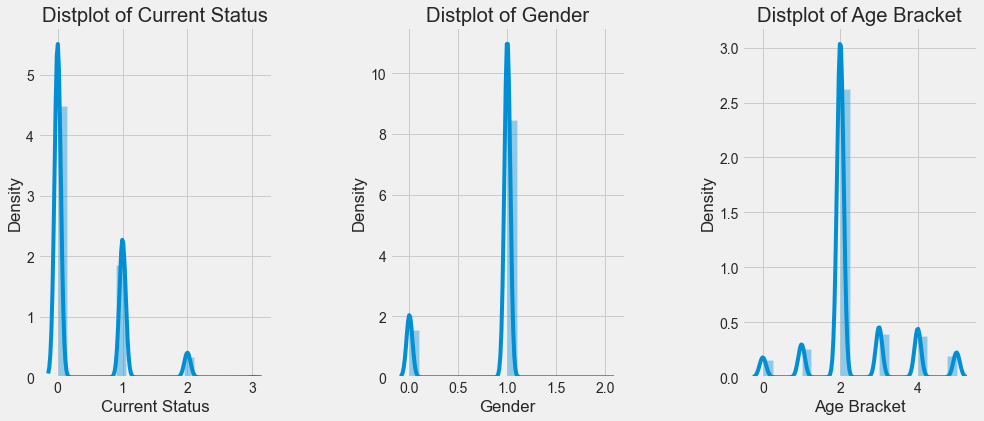

In [15]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Current Status' , 'Gender' , 'Age Bracket' ]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

 #### By the density graphic we can already detect the number of clusters of each variable :
   #### Current Status : 4 
   #### Gender : 5
   #### Age Bracket : 6
    
        

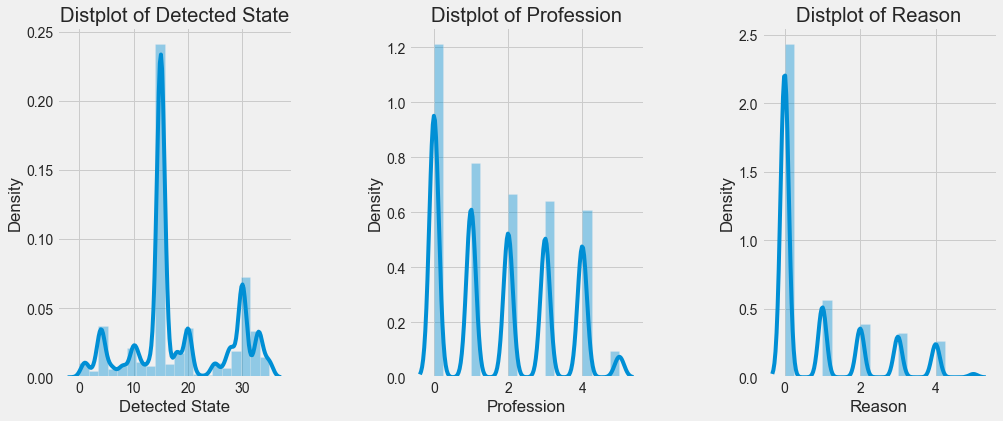

("'Profession'", ',', "'Reason'")

In [16]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in [ 'Detected State', 'Profession' , 'Reason' ]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
, 'Profession' , 'Reason'

 #### By the density graphic we can already detect the number of clusters of each variable :
   #### Detected State : Not Clear
   #### Profession : 6
   #### Reason : 6

## Analysing the Barriers Clusters using the Bar Chart  

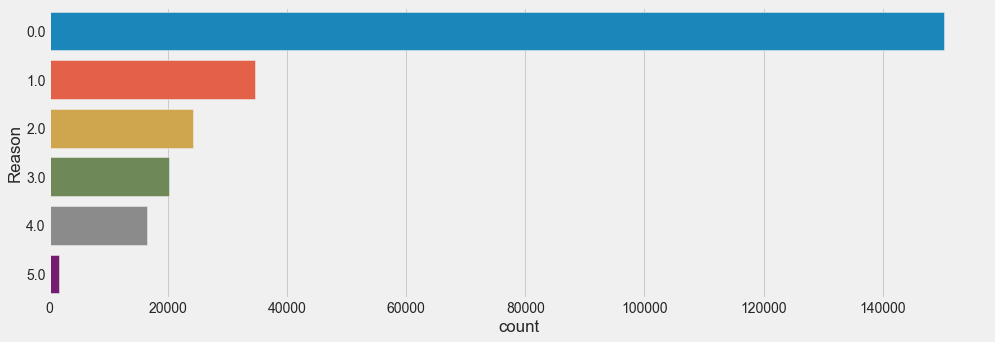

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Reason' , data = df)
plt.show()
# Vaccinated / Convinced
# Fear of side effects
# Non-availability of vaccines
# Being unaware of the need for vaccination
# Having no time
# Distance from vaccination centers

## Studying the Correlation between the Barrier and other dataset Variables

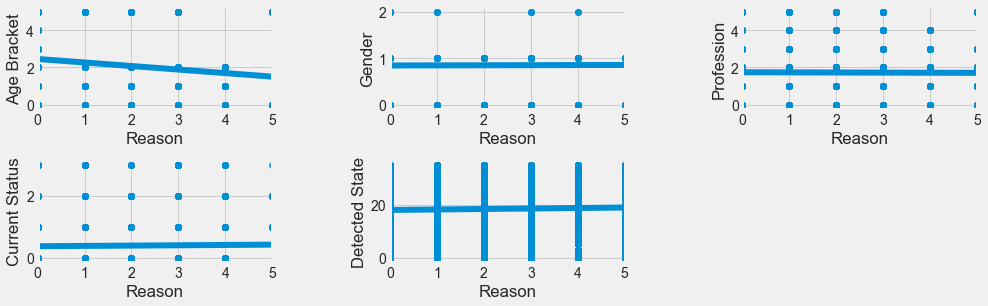

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in [ 'Reason']:
    for y in ['Age Bracket' , 'Gender' , 'Profession','Current Status', 'Detected State']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

## Visualizing the Barriers Clusters and their Occurence  Grahically 

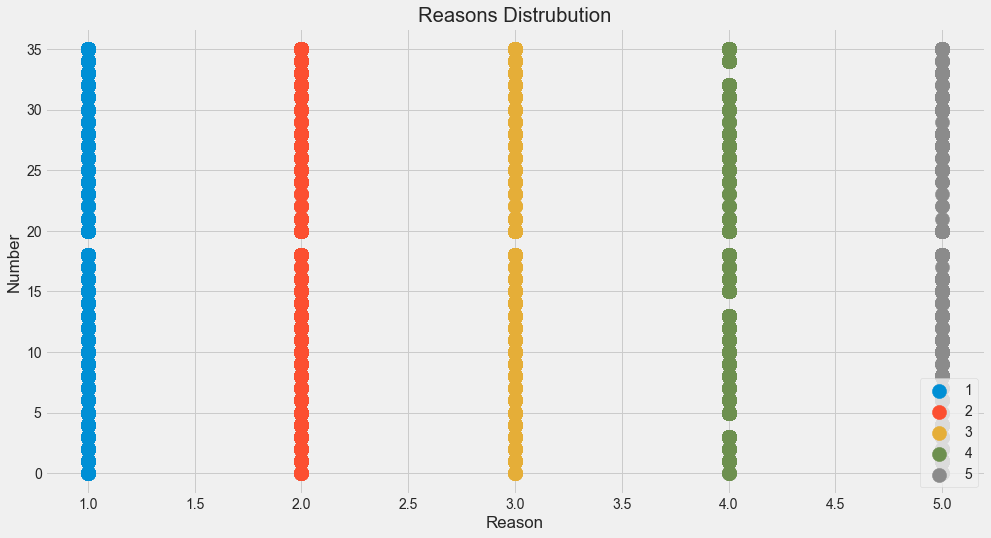

In [27]:
plt.figure(1 , figsize = (15 , 8))
for Reason in [1 , 2 ,3 ,4,5]:
    plt.scatter(x = 'Reason' , y = 'Detected State' , data = df[df['Reason'] == Reason] ,
                s = 200 , alpha = 1 , label = Reason)
plt.xlabel('Reason'), plt.ylabel('Number') 
plt.title('Reasons Distrubution')
plt.legend()
plt.show()
# 0    Vaccinated / Convinced
# 1    Fear of side effects
# 2    Non-availability of vaccines
# 3    Being unaware of the need for vaccination
# 4    Having no time
# 5    Distance from vaccination centers

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Profession', 'Gender']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Reason' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Reason' , data = df)
    plt.ylabel('name' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## the confusion matrix

la matrice de confusion est une technique d’évaluation qui confronte la réalité au résultat obtenu (train & test) 

In [15]:
df.head()

,Gender,Detected State,PovertyRate,Current Status,JobLoss,FinancialSituation,Diseases,Profession,Reason
0,0,16,7.05,1,2,1,4,1,0.0
1,1,16,7.05,1,0,0,4,2,0.0
2,1,16,7.05,1,2,1,4,1,0.0
3,1,8,9.91,1,2,0,2,1,2.0
4,1,31,13.74,1,0,1,4,2,4.0


In order to build the confusion matrix We specify the range of variables we need .
.

In [16]:
# valeurs de toutes les colonnes
#colonnes => 0:8 (0 à 8 [non inclus])
#lignes = : (toutes les colonnes)
#reason
V_SansLabels=df.iloc[:,0:8];
#Labels
V_Labels=df.iloc[:,8];

Now, we set up the K MEANS algorithm, which takes as input a previously fixed number of clusters (I chose 5 clusters in my case) by assigning individuals to the centers of the closest clusters (according to a metric - / minimum distance).

# the contingency matrix

In [17]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=5);
kmeans.fit(V_SansLabels);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pd.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pd.crosstab(V_Labels,kmeans.labels_)

         0
0   123617
0   152434
0   152435
0   152436
0   152437
..     ...
4    28696
4    28697
4    28698
4    28700
4        0

[247236 rows x 1 columns]
[[14.06553023 15.34036536 30.03530849 27.80739581  7.12281817]
 [14.00199488 15.28409574 30.011441   27.78118378  7.00955548]
 [14.04504533 15.31764072 30.02083334 27.78976397  7.05400133]
 ...
 [ 1.33659531 17.15495836 17.21712882 18.44768098 12.7741531 ]
 [ 1.33659531 17.15495836 17.21712882 18.44768098 12.7741531 ]
 [ 2.12466257 17.19726383 17.26699719 18.62861851 12.82597609]]


col_0,0,1,2,3,4
Reason,,,,,
0.0,85769,29040,12520,10898,12076
1.0,19409,8535,2012,1636,3075
2.0,9889,4472,4527,3550,1685
3.0,10229,4557,1957,1574,1799
4.0,9858,4306,289,339,1600
5.0,588,457,91,157,342
